<a href="https://colab.research.google.com/github/hrushabh8899/intermediate-challenge/blob/master/Week2/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Linear Regression :**

**This is a Bi-Variate Linear Regression model written in python.** 


In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split

In [0]:
uploaded = files.upload()

Saving Real estate.csv to Real estate.csv


In [0]:
df = pd.read_csv('Real estate.csv')
print(df.head())

   No  transaction date  ...  longitude  house price of unit area
0   1          2012.917  ...  121.54024                      37.9
1   2          2012.917  ...  121.53951                      42.2
2   3          2013.583  ...  121.54391                      47.3
3   4          2013.500  ...  121.54391                      54.8
4   5          2012.833  ...  121.54245                      43.1

[5 rows x 8 columns]


#**House Age vs House price per unit area Plot**

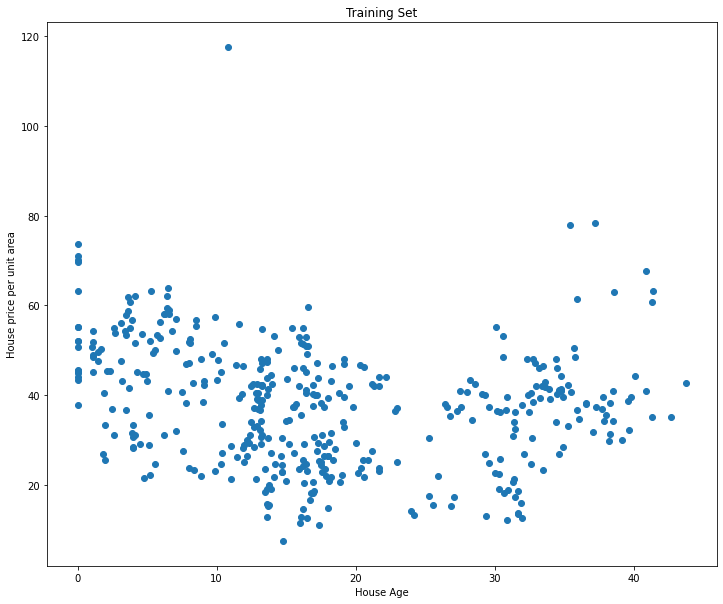

In [0]:
X = df.iloc[:,2]
y = df.iloc[:,7]
plt.figure(figsize=[12,10])
plt.title('Training Set')
plt.xlabel('House Age')
plt.ylabel('House price per unit area')
plt.scatter(X,y)
plt.show()

#**Linear Regression Algorithm:**

In [0]:
m, c, n = 0, 0, len(X)
L = 0.001
num_iter = 15000

for i in range(num_iter):
  y_pred = m*X + c

  D_m = (1/n)*sum((y_pred-y)*X)
  D_c = (1/n)*sum(y_pred-y)

  m -= L*D_m
  c -= L*D_c

print(m,c)

-0.2301684508297946 41.90157226659612


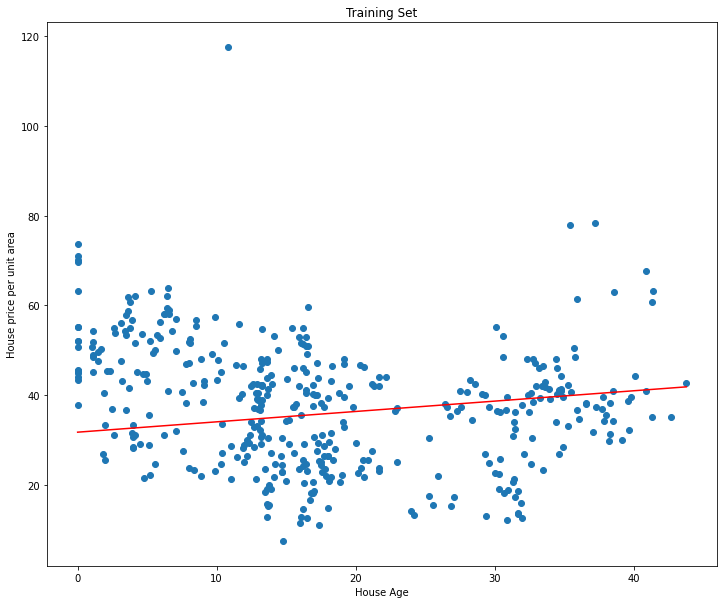

In [0]:
y_pred = m*X + c

plt.figure(figsize=[12,10])
plt.title('Training Set')
plt.xlabel('House Age')
plt.ylabel('House price per unit area')
plt.scatter(X,y)
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
plt.show()

#**Root Mean Squared Error:**

In [0]:
mse = np.sum((y_pred - y)**2)


rmse = np.sqrt(mse/n)
print(rmse)

13.28847260115961


#**2. K Nearest Neighbors:**

# **This is a KNN algorithm written in Python**

In [0]:
class KNearestNeighbors(object):
    def __init__(self, k):
        self.k = k
    @staticmethod  
    def euclidean_distance(v1, v2): #To calculate distance between 2 points
        v1, v2 = np.array(v1), np.array(v2)
        distance = 0
        for i in range(len(v1) - 1):
            distance += (v1[i] - v2[i]) ** 2
        return np.sqrt(distance)
    
    def predict(self, train, test): #Calculate distances between training data and test data
        distances = []
        for i in range(len(train_set)):
            dist = self.euclidean_distance(train[i][:-1], test)
            distances.append((train[i], dist))
        distances.sort(key=lambda x: x[1])

        neighbors = []
        for i in range(self.k): #Append top 'k' distances from 'distances' to neighbors
            neighbors.append(distances[i][0])

        classes = {}
        for i in range(len(neighbors)): #Calculate the most likely class for a particular point
            response = neighbors[i][-1]
            if response in classes:
                classes[response] += 1
            else:
                classes[response] = 1

        sorted_classes = sorted(classes.items(), key=lambda x: x[1], reverse=True)
        return sorted_classes[0][0]
    @staticmethod
    def evaluate(y_true, y_pred):
        n_correct = 0
        for act, pred in zip(y_true, y_pred):
            if act == pred:
                n_correct += 1
        return n_correct / len(y_true)

#**Loading the dataset:**

In [37]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
Y_iris = iris_dataset.target
iris_dataset = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris_dataset = pd.concat([iris_dataset, pd.Series(Y_iris)], axis=1)
iris_dataset.rename(columns={0: 'class'}, inplace=True)
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#**Splitting dataset into training data and test data:**

In [38]:
def train_test_split(dataset, test_size=0.25):
    n_test = int(len(dataset) * test_size)
    test_set = dataset.sample(n_test)
    train_set = []
    for i in dataset.index:
        if i in test_set.index:
            continue
        train_set.append(dataset.iloc[i])

    train_set = pd.DataFrame(train_set).astype(float).values.tolist()
    test_set = test_set.astype(float).values.tolist()

    return train_set, test_set 

train_set, test_set = train_test_split(iris_dataset)
len(train_set), len(test_set)

(113, 37)

#**Evaluating our model for k=3:**

In [39]:
knn = KNearestNeighbors(k=3)
preds = []

for row in test_set:
    predictors_only = row[:-1]
    prediction = knn.predict(train_set, predictors_only)
    preds.append(prediction)
    
actual = np.array(test_set)[:, -1]
knn.evaluate(actual, preds)

0.8918918918918919

#**Evaluating our model for various values of K:**

In [0]:
k_evaluations = []

for k in range(1, 22, 2):
    knn = KNearestNeighbors(k=k)
    preds = []
    
    for row in test_set:
        predictors_only = row[:-1]
        prediction = knn.predict(train_set, predictors_only)
        preds.append(prediction)
        
    curr_accuracy = knn.evaluate(actual, preds)
    k_evaluations.append((k, curr_accuracy*100))
    
k_evaluations

[(1, 83.78378378378379),
 (3, 89.1891891891892),
 (5, 91.8918918918919),
 (7, 89.1891891891892),
 (9, 89.1891891891892),
 (11, 94.5945945945946),
 (13, 97.2972972972973),
 (15, 91.8918918918919),
 (17, 91.8918918918919),
 (19, 89.1891891891892),
 (21, 86.48648648648648)]

#**3. KMeans :**

**This is an implementation of the KMeans clustering algorithm in Python**

In [0]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0) #To maintain the same random numbers on every execution

def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2)**2))

class KMeans():

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        #List of sample indices for each cluster
        self.clusters = [[] for i in range(self.K)]
        #The centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        #Initialize 
        random_sample_ind = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[ind] for ind in random_sample_ind]

        #Optimize clusters
        for i in range(self.max_iters):
            #Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            
            if self.plot_steps:
                self.plot()

            #Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            #Check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        #Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        #Each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_ind, cluster in enumerate(clusters):
            for sample_ind in cluster:
                labels[sample_ind] = cluster_ind
        return labels

    def _create_clusters(self, centroids):
        #Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for ind, sample in enumerate(self.X):
            centroid_ind = self._closest_centroid(sample, centroids)
            clusters[centroid_ind].append(ind)
        return clusters

    def _closest_centroid(self, sample, centroids):
        #Distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_ind = np.argmin(distances)
        return closest_ind

    def _get_centroids(self, clusters):
        #Assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_ind, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_ind] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        #Distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self): #Plotting the clusters at every iteration
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()


(500, 2)
3


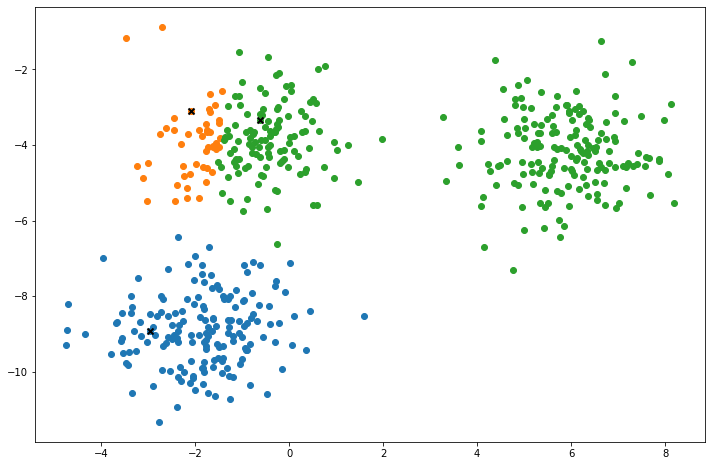

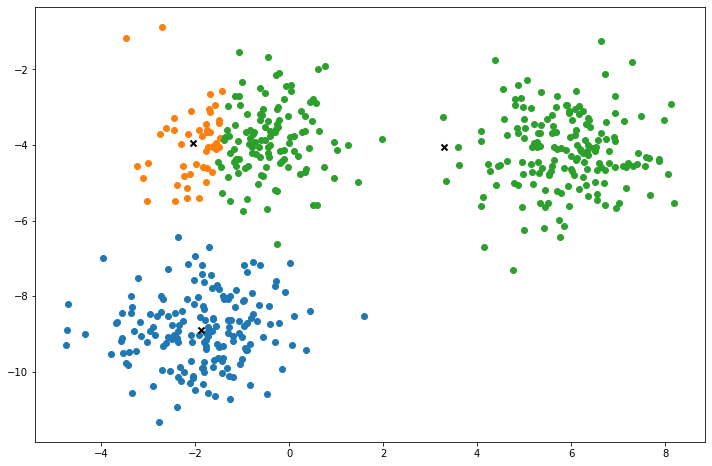

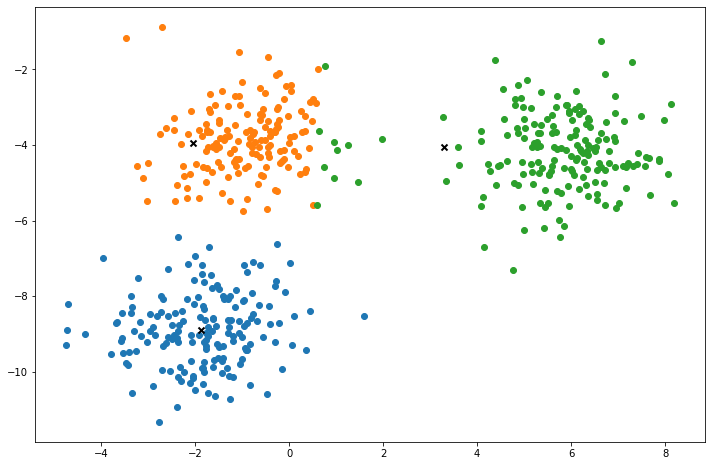

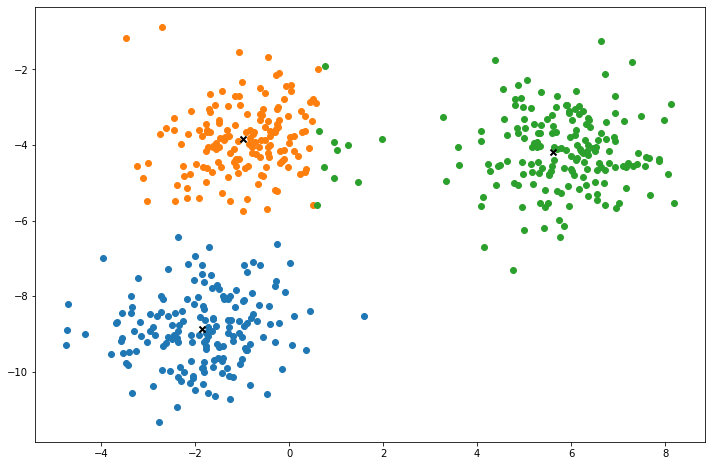

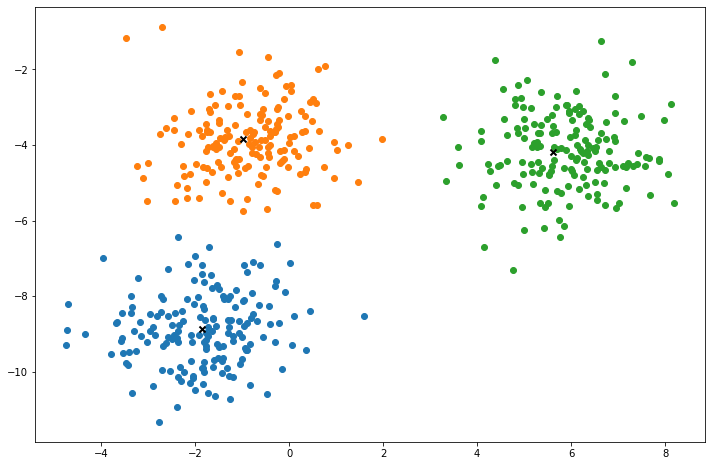

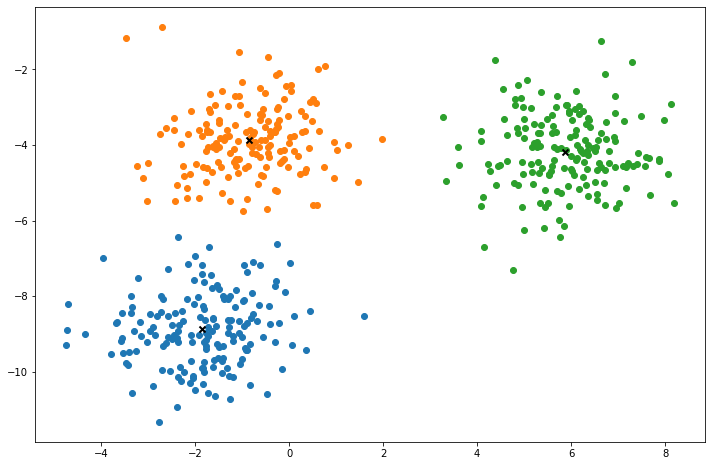

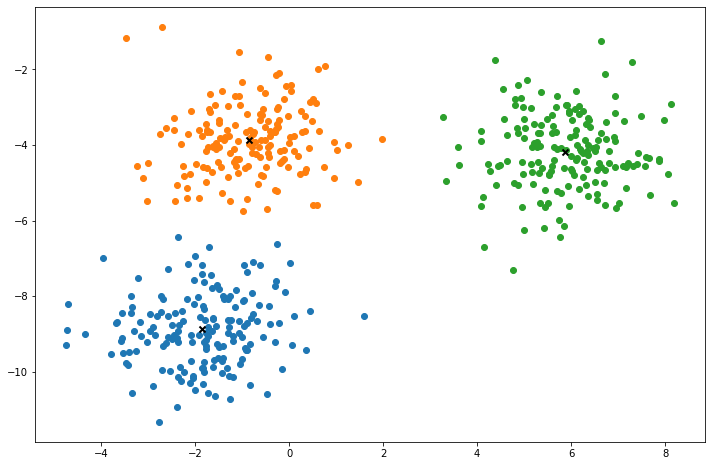

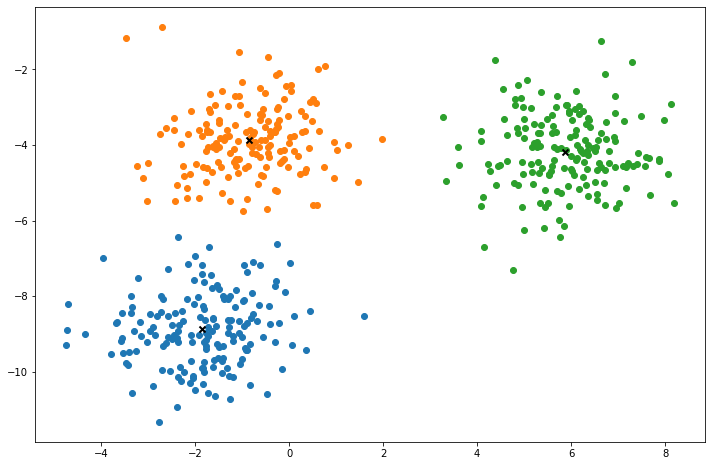

In [29]:
#tester code for KMeans

import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)
print(X.shape)
    
clusters = len(np.unique(y))
print(clusters)
k = KMeans(K=clusters, max_iters=150, plot_steps=True)
y_pred = k.predict(X)

k.plot()
